In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps
from matplotlib import colors
import matplotlib.path as mpath

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num

import gsw

# read grid file for lon/lat coordinates
dg = xr.open_dataset("/scratch/project_2000339/boeiradi/waom10_frc/waom10extend_grd.nc")
lat_rho_10km= dg.variables["lat_rho"]
lon_rho_10km = dg.variables["lon_rho"]
lat_u_10km= dg.variables["lat_u"]
lon_u_10km = dg.variables["lon_u"]
lat_v_10km= dg.variables["lat_v"]
lon_v_10km = dg.variables["lon_v"]
cor_10km = dg.variables["f"]
pm_10km = dg.variables["pm"]
pn_10km = dg.variables["pn"]
zice_10km = dg.variables["zice"]
h_10km = dg.variables["h"]
dg.close()


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


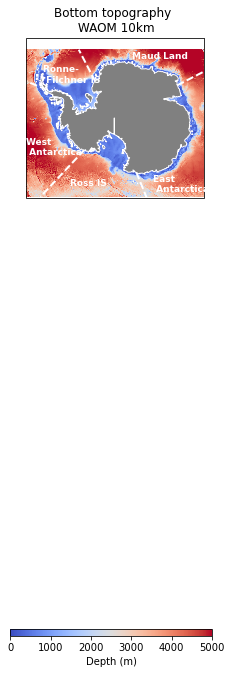

<Figure size 432x288 with 0 Axes>

In [2]:
def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-65,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-50,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return

proj = ccrs.SouthPolarStereo()

# create mask per longitude: Weddell, Maud Land, East Antarctica, Ross, West Antarctica


fig = plt.figure(figsize=(8,10))

ax1 = fig.add_subplot(321, projection=proj)
# 1) Mask Weddell (90W : 25W, lat < -73, 65W : 25W, lat <= -73)
# ax1 = fig.add_subplot(111, projection=proj)
c1=plt.pcolormesh(lon_rho_10km, lat_rho_10km, h_10km, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=0, vmax=5000)
plt.plot(-25*np.ones(len(np.arange(-76,-64,.1))),np.arange(-76,-64,.1), linestyle='dashed', color='w', transform=ccrs.PlateCarree(), linewidth=2)          
plt.plot(-65*np.ones(len(np.arange(-67,-60.2,.1))),np.arange(-67,-60.2,.1), linestyle='dashed', color='w', transform=ccrs.PlateCarree(), linewidth=2)          
plt.text(-61,-65,'Ronne- \n Filchner IS',weight='bold', color='w', transform=ccrs.PlateCarree(), fontsize=9)
plt.plot(60*np.ones(len(np.arange(-67.5,-55.7,.1))),np.arange(-67.5,-55.7,.1), linestyle='dashed', color='w', transform=ccrs.PlateCarree(), linewidth=2)          
plt.text(15,-69,'Maud Land',weight='bold', color='w', transform=ccrs.PlateCarree(), fontsize=9)
plt.plot(160*np.ones(len(np.arange(-70,-61,.1))),np.arange(-70,-61,.1), linestyle='dashed', color='w', transform=ccrs.PlateCarree(), linewidth=2)          
plt.text(155,-62,'East \n Antarctica',weight='bold', color='w', transform=ccrs.PlateCarree(), fontsize=9)
plt.plot(-140*np.ones(len(np.arange(-75.5,-55,.1))),np.arange(-75.5,-55,.1), linestyle='dashed', color='w', transform=ccrs.PlateCarree(), linewidth=2)          
plt.text(-150,-63,'Ross IS',weight='bold', color='w', transform=ccrs.PlateCarree(), fontsize=9)
plt.text(-115,-60,'West \n Antarctica',weight='bold', color='w', transform=ccrs.PlateCarree(), fontsize=9)
plt.title('Bottom topography \n WAOM 10km')
# ax1.coastlines(resolution='110m')
# ax1.gridlines()
# lonlat_labels(ax1)    
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax1.set_extent([-180, 180, -90, -62.5], crs=ccrs.PlateCarree())
cbar_ax1 = fig.add_axes([0.12, 0.05, 0.35, 0.01])
fig.colorbar(c1, cax=cbar_ax1, orientation='horizontal')
cbar_ax1.set_xlabel('Depth (m)')#, labelpad=-35)
#set aspect ratio to 1
ratio = .9
x_left, x_right = ax1.get_xlim()
y_low, y_high = ax1.get_ylim()
ax1.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

plt.show()

fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/'
name_fig="waom10extend_subregion_masks.png"
plt.savefig(fig_path + name_fig, dpi=300)



# 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
# 2) Mask Maud Land (25W : 60E, lat < -60)
# 3) Mask East Antarctica (60E : 160E, lat < -60)
# 4) Mask Ross (140W : 160E, lat < -60)
# 5) Mask West Antarctica (150W : 90W, lat < -65)


In [3]:
# find values of density classes for WMT maps (new plots 26.1.2022):

rho_grid=np.arange(24.4,29.1,0.1) # for sigma-0
print(rho_grid[31])

27.500000000000043


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'color'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


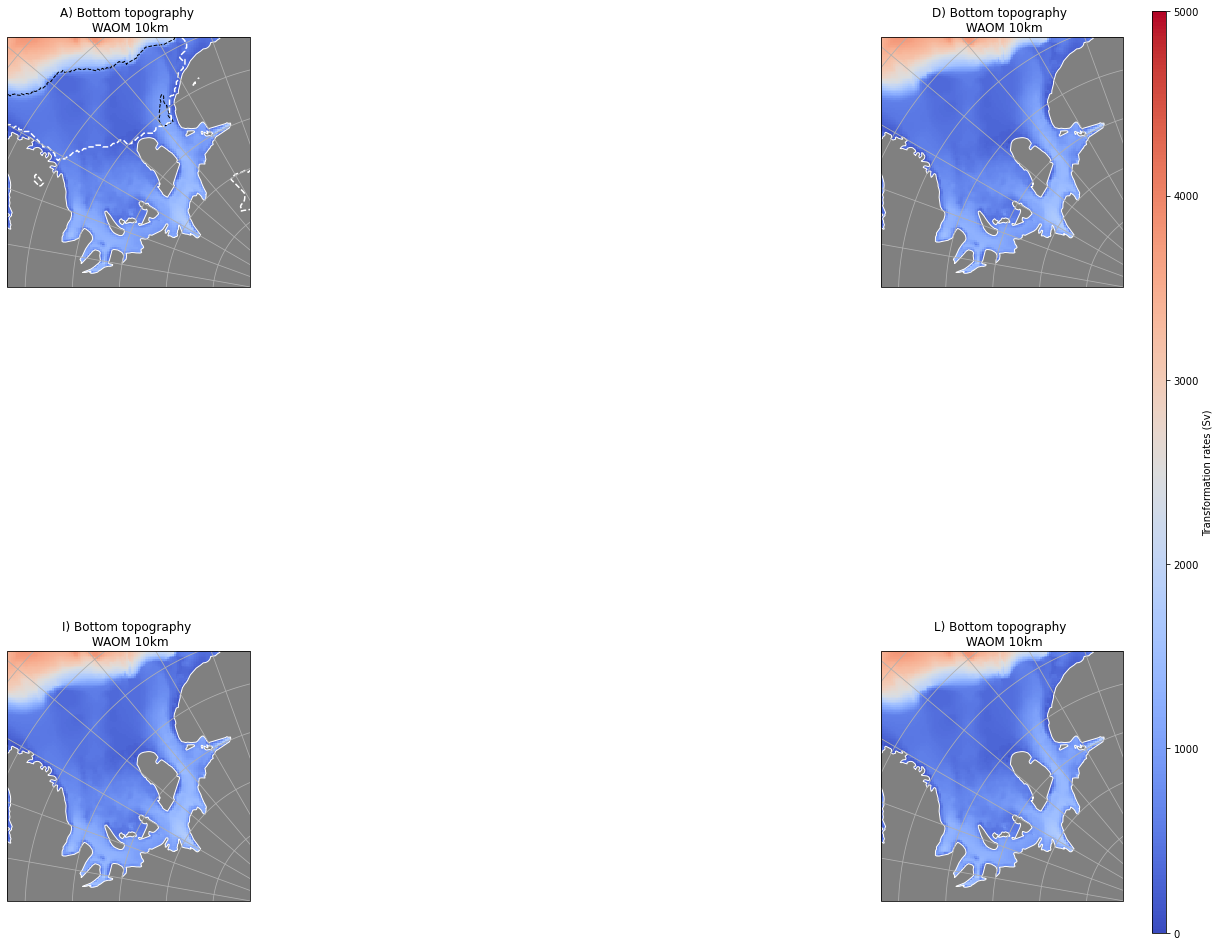

In [4]:
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')

fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(3,4,1, projection=proj)
c1=plt.pcolormesh(lon_rho_10km, lat_rho_10km, h_10km, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=0, vmax=5000)
plt.title('A) Bottom topography \n WAOM 10km')
ax1.gridlines()
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho_10km[300:500,100:300], lat_rho_10km[300:500,100:300],zice_10km[300:500,100:300],levels=[-.1],linestyles='dashed', color='w', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
ax1.set_ylabel('WAOM10')

ax2 = fig.add_subplot(3,4,4, projection=proj)
c1=plt.pcolormesh(lon_rho_10km, lat_rho_10km, h_10km, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=0, vmax=5000)
plt.title('D) Bottom topography \n WAOM 10km')
ax2.gridlines()
ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())

ax3 = fig.add_subplot(3,4,9, projection=proj)
c1=plt.pcolormesh(lon_rho_10km, lat_rho_10km, h_10km, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=0, vmax=5000)
plt.title('I) Bottom topography \n WAOM 10km')
ax3.gridlines()
ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())

ax4 = fig.add_subplot(3,4,12, projection=proj)
c1=plt.pcolormesh(lon_rho_10km, lat_rho_10km, h_10km, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=0, vmax=5000)
plt.title('L) Bottom topography \n WAOM 10km')
ax4.gridlines()
ax4.add_feature(cfeature.LAND, zorder=1, edgecolor='white', facecolor='gray')
ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())

cbar_ax1 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
fig.colorbar(c1, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates (Sv)')#, labelpad=-35)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

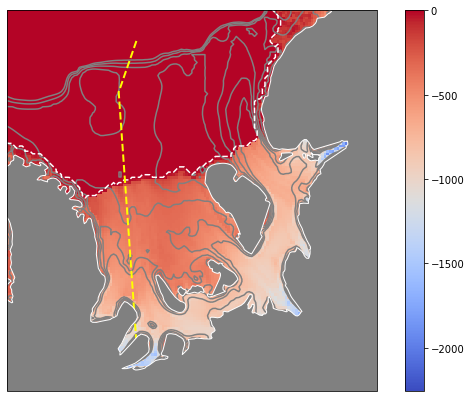

In [11]:
xlimit = np.arange(300,500,1)
ylimit = np.arange(100,300,1)

# sections to investigate Ross-Filchner and Ross IS dynamics:
xi_pt = [175, 200, 255, 310]
eta_sec_ini = [320, 330, 150, 100]
eta_sec_end = [440, 450, 215, 239]


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection=proj)
cz=plt.pcolormesh(lon_rho_10km[300:500,100:300], lat_rho_10km[300:500,100:300],zice_10km[300:500,100:300],transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
# plt.contour(lon_rho_10km[300:500,100:300], lat_rho_10km[300:500,100:300],zice_10km[300:500,100:300],levels=[-.1],linestyles='dashed', color='w', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho_10km[xlimit,ylimit], lat_rho_10km[xlimit,ylimit],h_10km[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(),colors='grey')# cmap=plt.cm.Greens)
plt.contour(lon_rho_10km[xlimit,ylimit], lat_rho_10km[xlimit,ylimit],zice_10km[xlimit,ylimit],levels=[-.1],linestyles='dashed', color='w', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
# Weddell
ii=0
plt.plot([lon_rho_10km[eta_sec_ini[ii],xi_pt[ii]], lon_rho_10km[eta_sec_end[ii],xi_pt[ii]]],[lat_rho_10km[eta_sec_ini[ii],xi_pt[ii]], lat_rho_10km[eta_sec_end[ii],xi_pt[ii]]],color='yellow',transform=ccrs.PlateCarree(),linewidth=2, linestyle='dashed')
plt.colorbar(cz)
ax.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax.set_ylabel('teste')
ax.add_feature(cfeature.LAND, zorder=2, edgecolor='white', facecolor='gray')
plt.show()

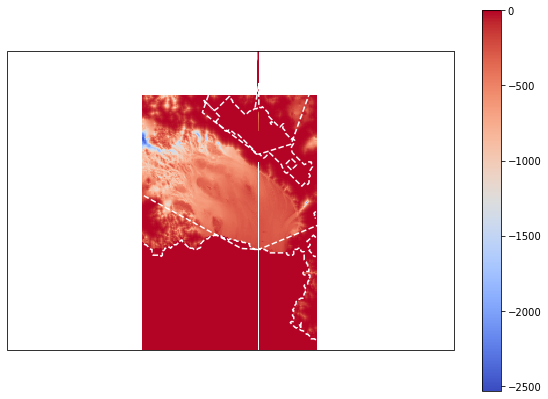

In [38]:
xlimit = np.arange(50,300,1)
ylimit = np.arange(200,350,1)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection=proj)
cz=plt.pcolormesh(lon_rho_10km[xlimit,ylimit], lat_rho_10km[xlimit,ylimit],zice_10km[xlimit,ylimit],transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
#plt.contour(lon_rho_10km[xlimit,ylimit], lat_rho_10km[xlimit,ylimit],h_10km[xlimit,ylimit],levels=(250,500,750,1000), transform=ccrs.PlateCarree(), cmap=plt.cm.Greens)
plt.contour(lon_rho_10km[xlimit,ylimit], lat_rho_10km[xlimit,ylimit],zice_10km[xlimit,ylimit],levels=[-.1],linestyles='dashed', color='w', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.colorbar(cz)
ax.set_extent([130, 280, -85, -70], crs=ccrs.PlateCarree())
ax.set_ylabel('teste')
plt.show()

In [10]:
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')

In [6]:
rho_grid=np.arange(24.4,29.1,0.1) # for sigma-0


In [7]:
print(rho_grid)

[24.4 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4 25.5 25.6 25.7
 25.8 25.9 26.  26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9 27.  27.1
 27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.  28.1 28.2 28.3 28.4 28.5
 28.6 28.7 28.8 28.9 29.  29.1]


In [13]:
print(rho_grid[29],rho_grid[32])

27.30000000000004 27.600000000000044


In [14]:
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')


AttributeError: module 'cartopy.feature' has no attribute 'GSHHS'

In [ ]:
xlimit = np.arange(300,500,1)
ylimit = np.arange(100,300,1)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection=proj)
cz=plt.pcolormesh(lon_rho_10km[300:500,100:300], lat_rho_10km[300:500,100:300],zice_10km[300:500,100:300],transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm)
# plt.contour(lon_rho_10km[300:500,100:300], lat_rho_10km[300:500,100:300],zice_10km[300:500,100:300],levels=[-.1],linestyles='dashed', color='w', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho_10km[xlimit,ylimit], lat_rho_10km[xlimit,ylimit],zice_10km[xlimit,ylimit],levels=[-.1],linestyles='dashed', color='w', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.colorbar(cz)
ax.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax.set_ylabel('teste')
plt.show()